# K-NN on Different Datasets.
In this notebook we will apply knn on various small datasets.

What exactly we will do is-<br>
1: Creating a function which apply knn on dataset for a given value of K.<br>
2: It also plots the results.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
import pandas as pd

In [3]:
df = pd.read_csv("6.overlap.csv", names=['x1', 'x2', 'Y'])
df

,x1,x2,Y
0,7.0,3.2,0
1,6.4,3.2,0
2,6.9,3.1,0
3,5.5,2.3,0
4,6.5,2.8,0
...,...,...,...
95,6.7,3.0,1
96,6.3,2.5,1
97,6.5,3.0,1
98,6.2,3.4,1


In [4]:
import seaborn as sns

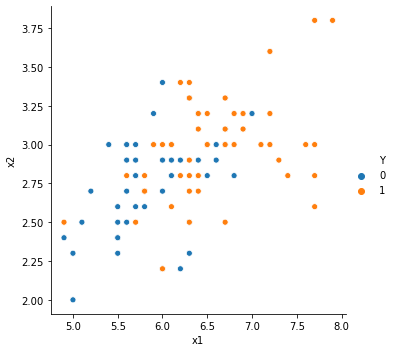

In [5]:
sns.relplot(x="x1", y="x2", hue="Y", data=df)

In [1]:
# So this is our data which we are going to work on.
# We have created a x1 vs x2 graph. For each x1 value what is the x2 value.
# Y column show the class label for each combination of (x1, x2)

# This dataset has some overlaped values. Also we are working with only 100 datapoints so it's hard to 
# to see the difference by just scatter plot.

# Let's see what K-NN will do with this data.

#### Taking Dataframe values in array.

In [ ]:
# We cannot give dataframe values to K-NN model directly.
# So we will create numpy array. Which is suitable to pass in K-NN model.

In [8]:
X = df[['x1','x2']].values
X

array([[7. , 3.2],
       [6.4, 3.2],
       [6.9, 3.1],
       [5.5, 2.3],
       [6.5, 2.8],
       [5.7, 2.8],
       [6.3, 3.3],
       [4.9, 2.4],
       [6.6, 2.9],
       [5.2, 2.7],
       [5. , 2. ],
       [5.9, 3. ],
       [6. , 2.2],
       [6.1, 2.9],
       [5.6, 2.9],
       [6.7, 3.1],
       [5.6, 3. ],
       [5.8, 2.7],
       [6.2, 2.2],
       [5.6, 2.5],
       [5.9, 3.2],
       [6.1, 2.8],
       [6.3, 2.5],
       [6.1, 2.8],
       [6.4, 2.9],
       [6.6, 3. ],
       [6.8, 2.8],
       [6.7, 3. ],
       [6. , 2.9],
       [5.7, 2.6],
       [5.5, 2.4],
       [5.5, 2.4],
       [5.8, 2.7],
       [6. , 2.7],
       [5.4, 3. ],
       [6. , 3.4],
       [6.7, 3.1],
       [6.3, 2.3],
       [5.6, 3. ],
       [5.5, 2.5],
       [5.5, 2.6],
       [6.1, 3. ],
       [5.8, 2.6],
       [5. , 2.3],
       [5.6, 2.7],
       [5.7, 3. ],
       [5.7, 2.9],
       [6.2, 2.9],
       [5.1, 2.5],
       [5.7, 2.8],
       [6.3, 3.3],
       [5.8, 2.7],
       [7.1,

In [9]:
y = df['Y'].astype(int).values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#### Applying K-NN on data.

In [14]:
# Now using neighbors module from sklearn we will apply K-NN. 
# neighbors.KNeighborsClassifier(n_neighbors=k)  will be used for K-NN. Here n_neighbore means K value.

# First we will initiate KNeighborsClassifier(n_neighbors=k) object. Giving K value in n_neighbors parameter.
knn_model = neighbors.KNeighborsClassifier(n_neighbors=1)   # K = 1


# Now we will perform fit() 
knn_model.fit(X,y)                # K-NN is applied to X and y and results are saved in knn_model object.

KNeighborsClassifier(n_neighbors=1)

### Notice that we are just fitting the data and seeing the results using plot. This will show us how different K values works on same dataset. We are not making any predictions here. We just trying to observe how different K values behaves with D_train.

In [15]:
# Now we have done fit(). We can plot our results. 
# We will use plot_decision_regions() to get a decision surface/region plot.
# Decision region tells us, what will be the class of an unseen point if it lies in that region.

### Plotting the results.

In [12]:
# https://anaconda.org/conda-forge/mlxtend
from mlxtend.plotting import plot_decision_regions        # pip intall mlxtend for error.

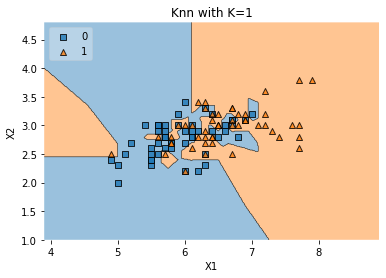

In [16]:
# Plotting decision regions
plot_decision_regions(X, y, clf=knn_model, legend=2)

# Here in clf we have passed knn_model which has results in it after applying K-NN on X and y

# Adding axes annotations
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Knn with K=1')
plt.show()

# Putting it all together.
Now we will create a fuction which can do the same we have done above. Because we have to repeat the same process on different values of K.

In [21]:
# In this function we will pass data= Dataframe and K = k value for K-NN

def knn_comparision(X, y, k):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)     # clf means classifier.
    clf.fit(X, y)                                           # our results will be saved in clf.

    # Plotting decision regions
    plot_decision_regions(X, y, clf=clf, legend=2)          # We will get Decision suface plot as Output.

    # Adding axes annotations
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Knn with K='+ str(k))
    plt.show()

# Applying K-NN on various K value and various Datasets.

### Overlap

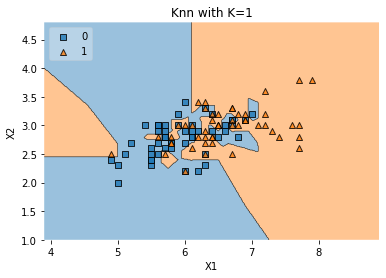

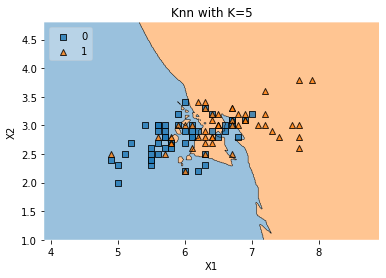

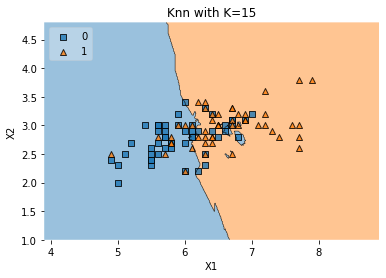

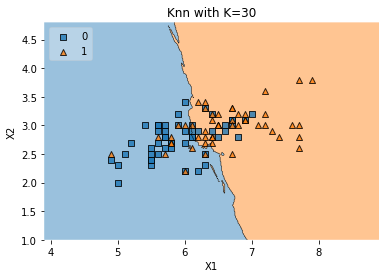

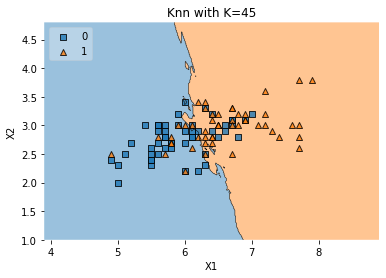

In [24]:
overlap = pd.read_csv("6.overlap.csv", names=['x1', 'x2', 'y'])
X = overlap[['x1','x2']].values
y = overlap['y'].astype(int).values

for k in [1, 5, 15, 30, 45]:
    knn_comparision(X, y, k)

### Ushape

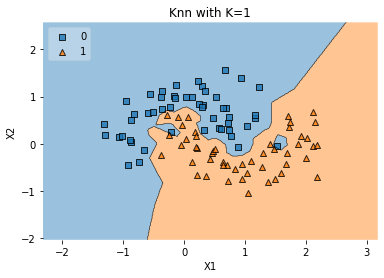

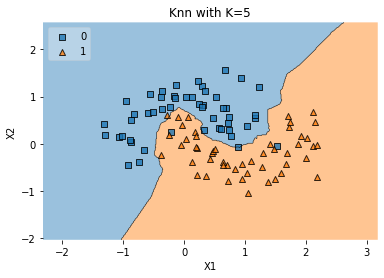

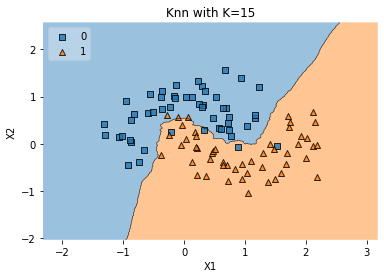

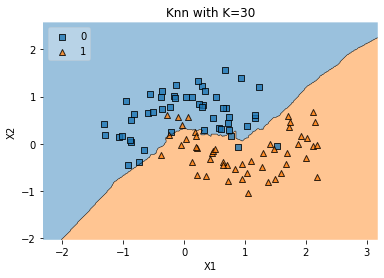

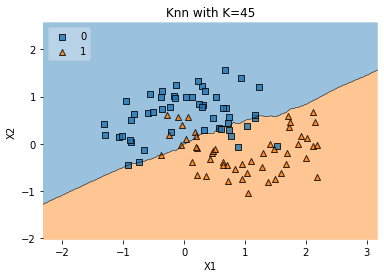

In [25]:
ushape = pd.read_csv("1.ushape.csv", names=['x1', 'x2', 'y'])
X = ushape[['x1','x2']].values
y = ushape['y'].astype(int).values

for k in [1, 5, 15, 30, 45]:
    knn_comparision(X, y, k)